# Igor Correa - 15.00588-7

## Análise do dataset
Os dados no arquivo não mostram oque significam cada uma das colunas, portanto não temos nenhuma informação sobre eles que possa ajudar na análise, temos que nos basear apenas nos valores em si.

## Importação do arquivo

In [1]:
import pandas as pd

df = pd.read_csv('csv_7.csv', header=None, names=['primeira', 'segunda'])

In [2]:
df.head()

primeira   segunda
0 -0.640796  5.915453
1 -0.224958  3.100613
2 -2.209570  0.135375
3  0.227791  4.127485
4  1.153364  2.670935

In [3]:
df.describe()

primeira      segunda
count  2000.000000  2000.000000
mean      0.569531     0.538601
std       2.556718     3.084468
min      -6.239135    -6.540020
25%      -1.566358    -2.153000
50%       0.545694     0.927238
75%       2.730436     2.663088
max       6.756897     7.854390

## Normalização

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler

x = df.values
x = np.nan_to_num(x)
dataset = StandardScaler().fit_transform(x)
dataset

array([[-0.47350915,  1.74363838],
       [-0.31082318,  0.83082506],
       [-1.08725172, -0.13076066],
       ...,
       [ 0.0046166 ,  1.57058838],
       [-0.97821803,  0.50098011],
       [-0.34869674,  1.37386073]])

## Clustering com scikit-learn

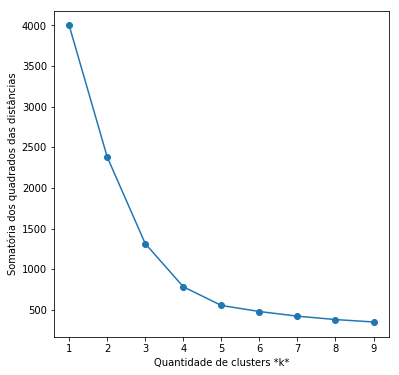

In [6]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(dataset)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Quantidade de clusters *k*')
plt.ylabel('Somatória dos quadrados das distâncias');

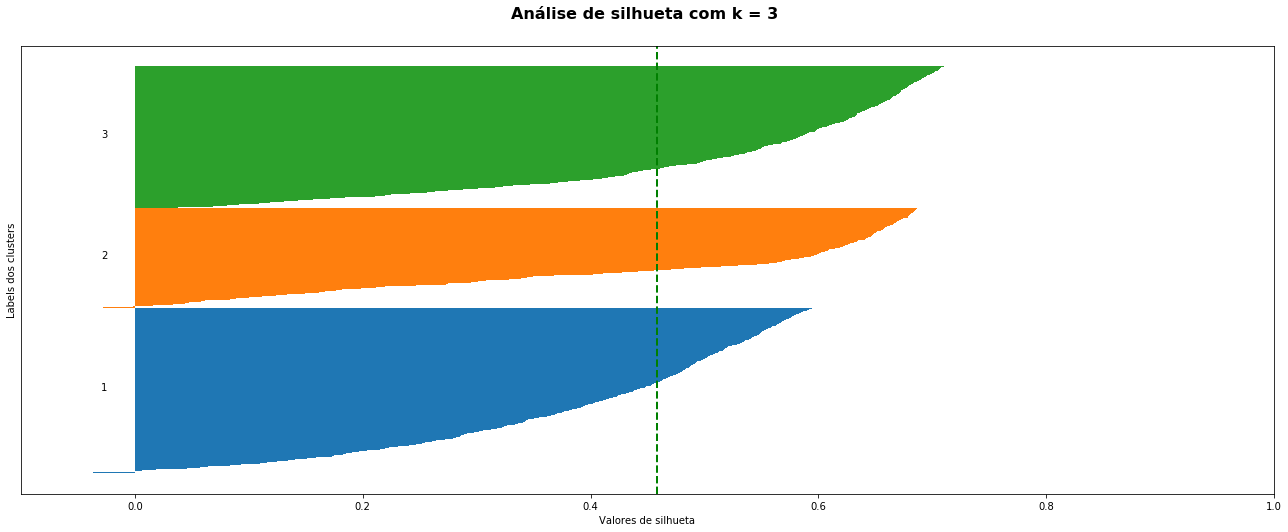

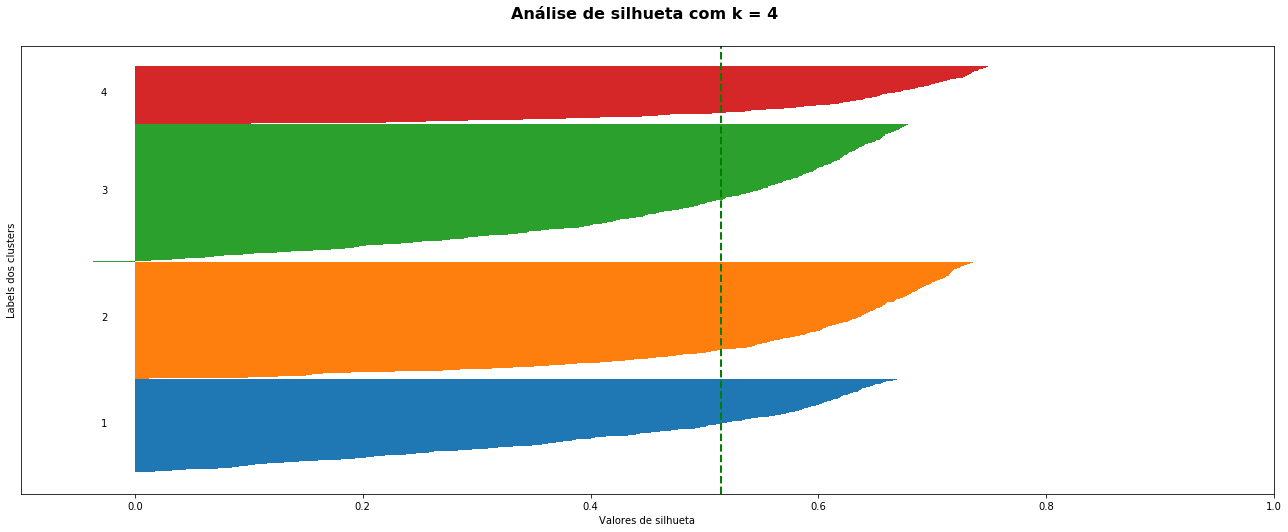

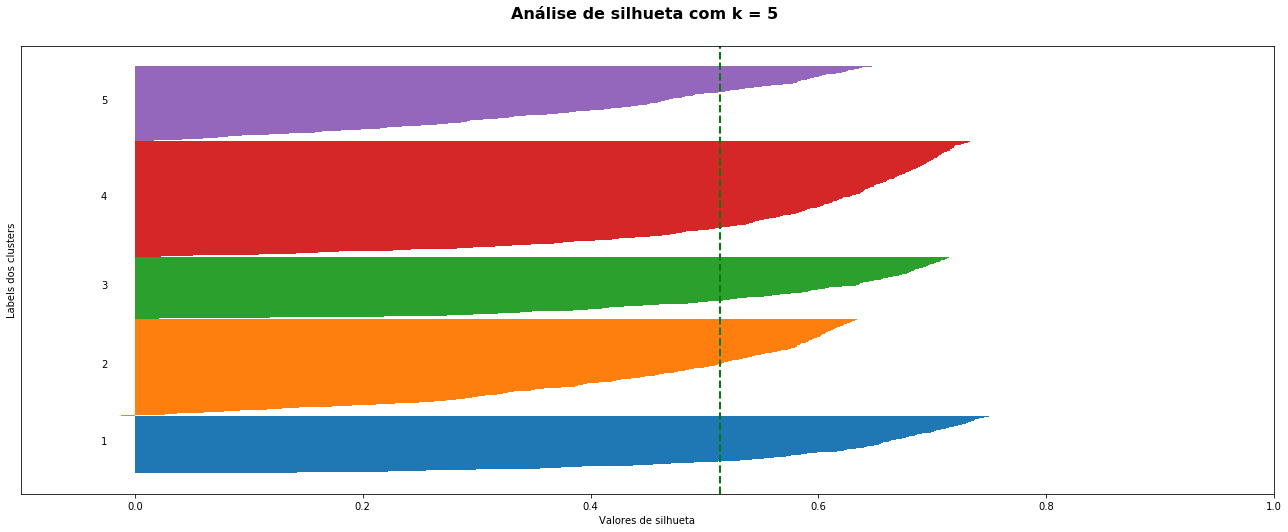

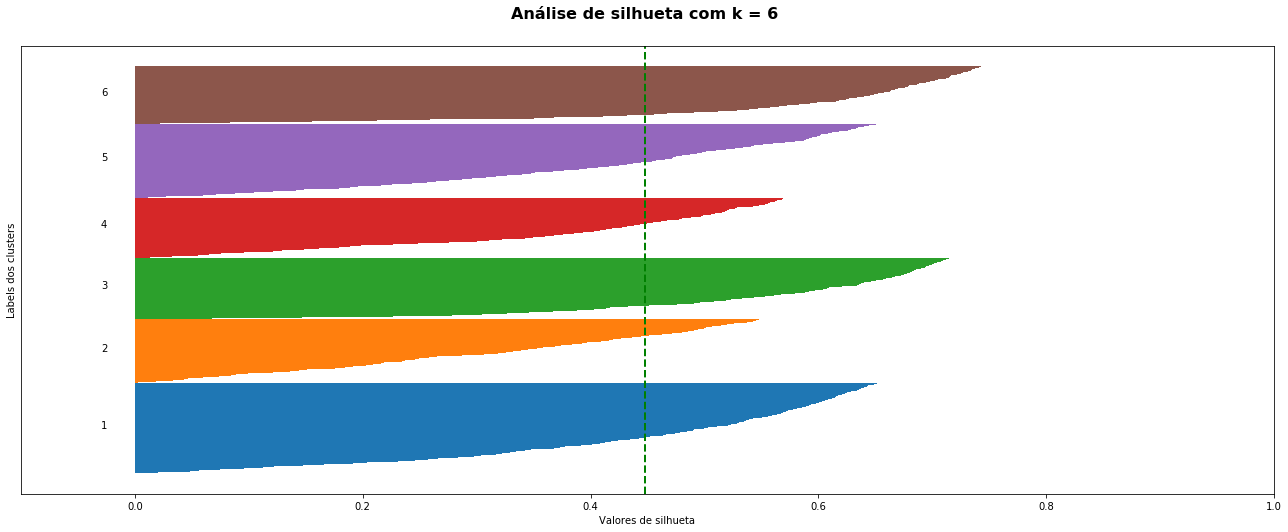

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([3, 4, 5, 6]):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(dataset)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(dataset, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Valores de silhueta')
    ax1.set_ylabel('Labels dos clusters')
    
    plt.tight_layout()
    plt.suptitle(f'Análise de silhueta com k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

## Análise
Analisando os gráficos de cotovelo e silhueta percebemos que as quantidades de 4 e 5 clusters obtem as melhores separações.

## Cluster Hierárquico com Scipy

In [9]:
import scipy

leng = dataset.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(dataset[i], dataset[j])

In [10]:
import pylab
from scipy.cluster import hierarchy

Z = hierarchy.linkage(D, 'complete')

C:\Users\Odete\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


In [11]:
from scipy.cluster.hierarchy import fcluster

k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 5, 4, ..., 5, 4, 5], dtype=int32)

In [12]:
fig = pylab.figure(figsize=(18,800))
def llf(id):
    return '[%s %s]' % ( df['primeira'][id], df['segunda'][id] )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## Referências
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a